In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Creating synthetic data points
from sklearn.datasets import make_classification

In [3]:
X, y = make_classification(n_samples = 1000, n_features = 2, n_classes = 2, n_clusters_per_class = 1, n_redundant = 0)

<Axes: xlabel='0', ylabel='1'>

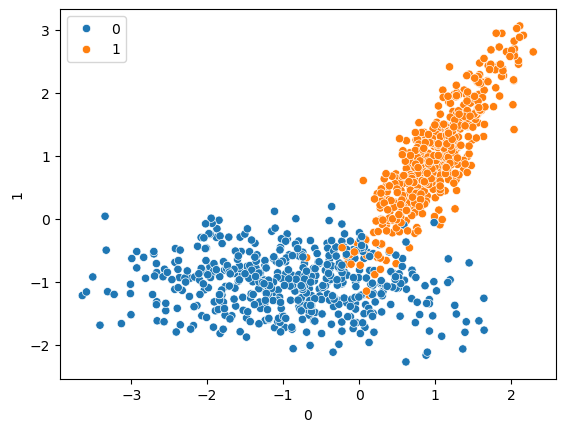

In [5]:
sns.scatterplot(x = pd.DataFrame(X)[0],y = pd.DataFrame(X)[1], hue = y)

In [6]:
from sklearn.svm import SVC
svc = SVC(kernel = "linear")

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [8]:
svc.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [9]:
y_pred  = svc.predict(X_test)

Accuracy: 0.972 
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       118
           1       0.99      0.95      0.97       132

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250



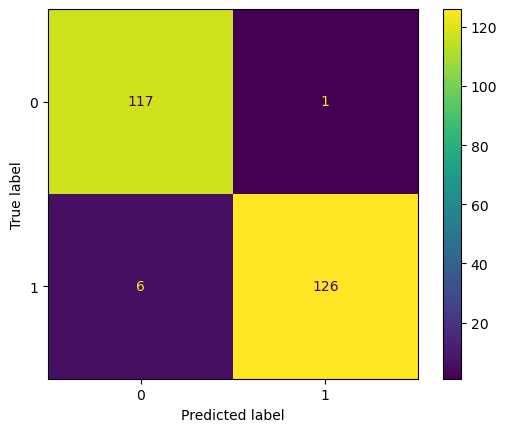

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
score = accuracy_score(y_test, y_pred)
con_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {score} \nClassification Report:\n {report}")
display = ConfusionMatrixDisplay(confusion_matrix = con_mat)
display.plot()
plt.show()

Accuracy: 0.984 
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       118
           1       1.00      0.97      0.98       132

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



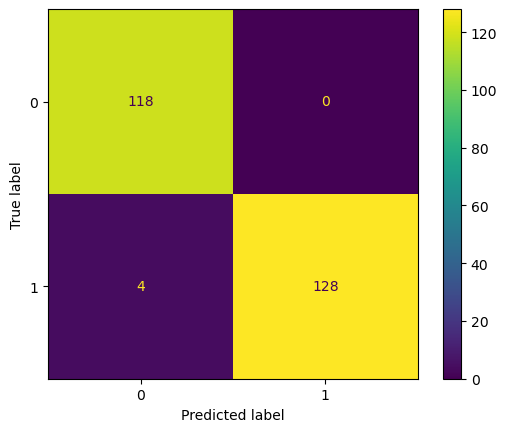

In [12]:
# USing the rbf kernel
rbf = SVC(kernel = "rbf")
rbf.fit(X_train, y_train)
y_pred = rbf.predict(X_test)

score = accuracy_score(y_test, y_pred)
con_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {score} \nClassification Report:\n {report}")
display = ConfusionMatrixDisplay(confusion_matrix = con_mat)
display.plot()
plt.show()

Accuracy: 0.96 
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.96       118
           1       0.94      0.99      0.96       132

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



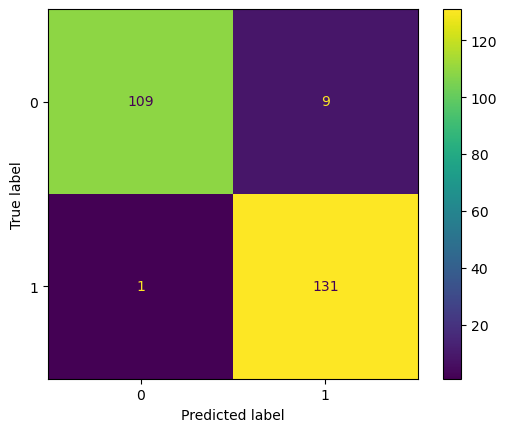

In [14]:
# USing the polynomial kernel
poly = SVC(kernel = "poly")
poly.fit(X_train, y_train)
y_pred = poly.predict(X_test)

score = accuracy_score(y_test, y_pred)
con_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {score} \nClassification Report:\n {report}")
display = ConfusionMatrixDisplay(confusion_matrix = con_mat)
display.plot()
plt.show()

In [15]:
# Performing hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#defining the parameter range
param_grid = {
    "C": [0.1, 1, 10, 100, 1000],
    "gamma": [1, 0.1, 0.01, 0.001, 0.0001],
    "kernel": ["rbf", "linear", "poly"]
}

In [16]:
grid = GridSearchCV(estimator = SVC(), param_grid = param_grid, cv = 5, verbose = 3, refit = True)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.980 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.933 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.953 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.947 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.940 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf', 'linear', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [17]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [18]:
grid.best_score_

np.float64(0.9666666666666666)

Accuracy: 0.984 
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       118
           1       1.00      0.97      0.98       132

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



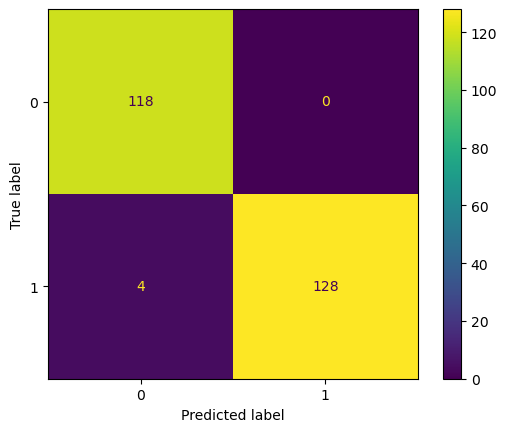

In [19]:
y_pred = grid.predict(X_test)

score = accuracy_score(y_test, y_pred)
con_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {score} \nClassification Report:\n {report}")
display = ConfusionMatrixDisplay(confusion_matrix = con_mat)
display.plot()
plt.show()

# Kernel Trick

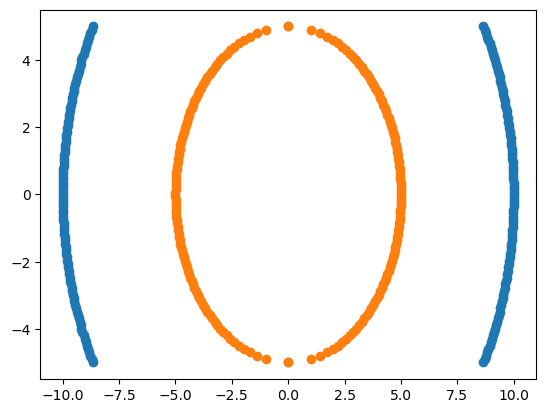

In [22]:
x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y = np.hstack([y, -y])
x = np.hstack([x, -x])

x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1, -y1])
x1 = np.hstack([x1, -x1])

plt.scatter(y, x)
plt.scatter(y1, x1)

In [29]:
#The data that we are working with is not currently linearily separable, so we will utilize the kernel trick
#to try raise the dimension of the data and create a line of best fit/hyperplane to said raised data
df1 = pd.DataFrame(np.vstack([y, x]).T, columns = ["x1", "x2"])
df1["Y"] = 0
df2 = pd.DataFrame(np.vstack([y1, x1]).T, columns = ["x1", "x2"])
df2["Y"] = 1
df = pd.concat([df1, df2])
df.head()

,x1,x2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [30]:
# Independent and Dependent features
X = df.iloc[:, :2]
y = df.Y

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [33]:
## Polynomial Kernel
df["X1_Square"] = df["x1"]**2
df["X2_Square"] = df["x2"]**2
df["X1*X2"] = (df["x1"] * df["x2"])
df.head()

,x1,x2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [34]:
# Independent and Dependent features
X = df[["x1", "x2", "X1_Square", "X2_Square", "X1*X2"]]
y = df["Y"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

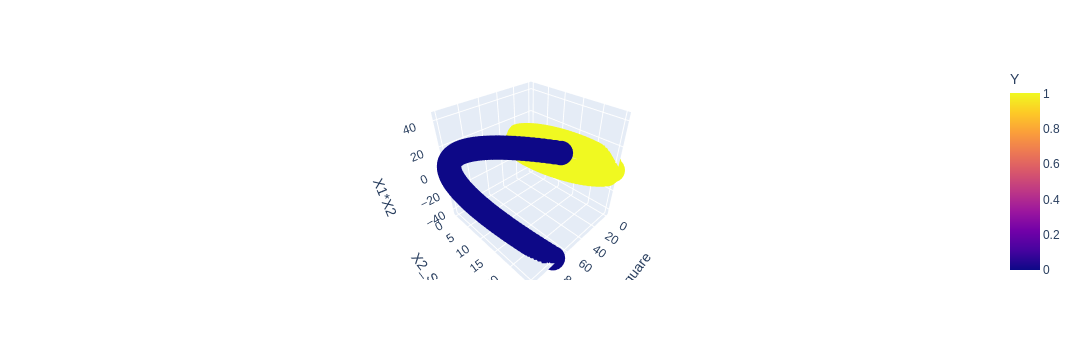

In [38]:
# Creating a 3d scatter plot 
import plotly.express as px

fig = px.scatter_3d(df, x = "X1_Square", y = "X2_Square", z = "X1*X2", color = "Y")
fig.show()

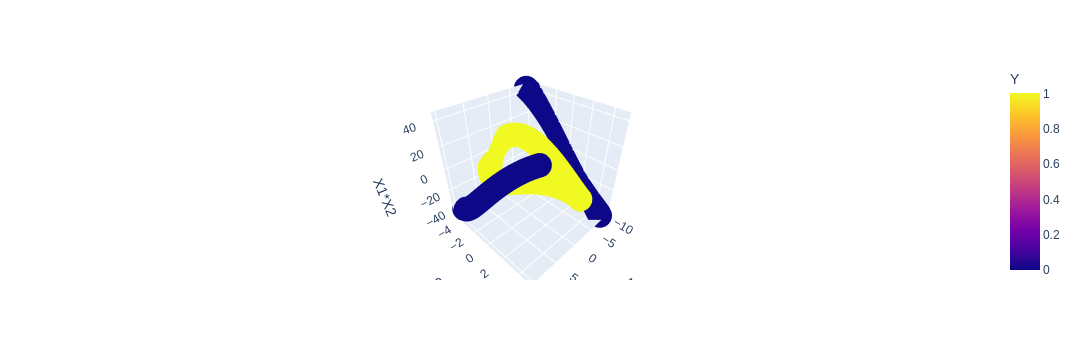

In [39]:
# Creating a 3d scatter plot 
import plotly.express as px

fig = px.scatter_3d(df, x = "x1", y = "x2", z = "X1*X2", color = "Y")
fig.show()

In [40]:
classifier = SVC(kernel = "linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Accuracy: 1.0 
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        48

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



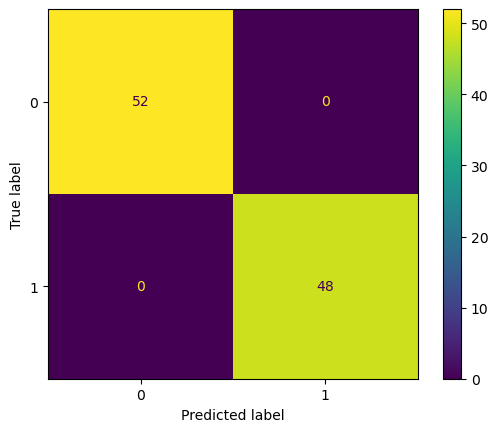

In [41]:
score = accuracy_score(y_test, y_pred)
con_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {score} \nClassification Report:\n {report}")
display = ConfusionMatrixDisplay(confusion_matrix = con_mat)
display.plot()
plt.show()

Accuracy: 1.0 
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        48

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



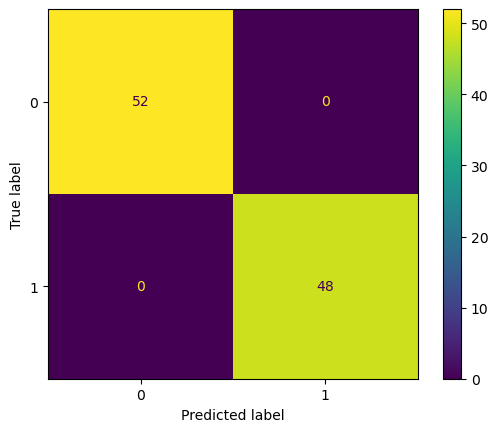

In [42]:
#What we did manually, is what using poly does in a svm
# that is performing the kernel trick by raising the datas dimension to a higher degree
# to make the classes linearly separable
classifier = SVC(kernel = "poly")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

score = accuracy_score(y_test, y_pred)
con_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {score} \nClassification Report:\n {report}")
display = ConfusionMatrixDisplay(confusion_matrix = con_mat)
display.plot()
plt.show()

# Support Vector Regression Implementation

In [43]:
#Getting the dataset
sns.load_dataset("tips")

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [44]:
df = sns.load_dataset("tips")

In [45]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [46]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [47]:
df.duplicated().sum()

np.int64(1)

In [49]:
df[df.duplicated()]

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [52]:
## Feature encoding
X = df.drop("total_bill", axis = 1)
X.head()

,tip,sex,smoker,day,time,size
0,1.01,Female,No,Sun,Dinner,2
1,1.66,Male,No,Sun,Dinner,3
2,3.50,Male,No,Sun,Dinner,3
3,3.31,Male,No,Sun,Dinner,2
4,3.61,Female,No,Sun,Dinner,4


In [53]:
y = df["total_bill"]
y

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 42)

In [55]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()

X_train["sex"] = le1.fit_transform(X_train["sex"])
X_train["smoker"] = le2.fit_transform(X_train["smoker"])
X_train["time"] = le3.fit_transform(X_train["time"])

X_test["sex"] = le1.transform(X_test["sex"])
X_test["smoker"] = le2.transform(X_test["smoker"])
X_test["time"] = le3.transform(X_test["time"])

In [57]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers = [("onehot", OneHotEncoder(drop = "first"), [3])],
                                       remainder = "passthrough"
                                      )

In [59]:
X_train = ct.fit_transform(X_train)

In [60]:
X_test = ct.transform(X_test)

In [61]:
## SVR --> Support Vector Regression
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [62]:
y_pred = svr.predict(X_test)

In [63]:
## Getting the performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
adjusted_score = 1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)


print(f"MSE: {mse} \nMAE: {mae} \nRMSE: {rmse} \nR^2 Scored: {score} \nAjusted R Squared: {adjusted_score}")

MSE: 39.31122612339172 
MAE: 4.463296539661225 
RMSE: 6.269866515595983 
R^2 Scored: 0.49798620106004743 
Ajusted R Squared: 0.4207533089154393


In [65]:
## Hyperparameter tuning 
from sklearn.model_selection import GridSearchCV

#defining the parameter range
param_grid = {
    "C": [0.1, 1, 10, 100, 1000],
    "gamma": [1, 0.1, 0.01, 0.001, 0.0001],
    "kernel": ["rbf"]
}

In [66]:
grid = GridSearchCV(estimator = SVR(), param_grid = param_grid, refit = True, verbose = 3)

In [67]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.114 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.008 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.003 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.015 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.123 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.019 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.096 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.078 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.099 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.020 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.102 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

,estimator,SVR()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,kernel,'rbf'


In [68]:
y_pred = grid.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
adjusted_score = 1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)


print(f"MSE: {mse} \nMAE: {mae} \nRMSE: {rmse} \nR^2 Scored: {score} \nAjusted R Squared: {adjusted_score}")

MSE: 34.21448856486322 
MAE: 4.260483973872268 
RMSE: 5.849315221875396 
R^2 Scored: 0.5630727637616455 
Ajusted R Squared: 0.4958531889557448


In [69]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [70]:
grid.best_score_

np.float64(0.5205632165395404)